In [49]:
import pyupbit

In [50]:
# BTC 최근 200시간의 data load
df = pyupbit.get_ohlcv("KRW-BTC", count=10000)
df


,open,high,low,close,volume,value
2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...
2022-03-11 09:00:00,48931000.0,49941000.0,47802000.0,48315000.0,7089.912741,3.454654e+11
2022-03-12 09:00:00,48314000.0,49098000.0,48202000.0,48500000.0,2697.302198,1.314185e+11
2022-03-13 09:00:00,48500000.0,48904000.0,47310000.0,47510000.0,4109.285912,1.984343e+11
2022-03-14 09:00:00,47500000.0,49515000.0,47186000.0,49171000.0,6352.923551,3.067274e+11


In [51]:
# 시간(ds)과 종가(y)값만 남긴다
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2017-09-25 09:00:00,4322000.0
1,2017-09-26 09:00:00,4321000.0
2,2017-09-27 09:00:00,4657000.0
3,2017-09-28 09:00:00,4586000.0
4,2017-09-29 09:00:00,4657000.0
...,...,...
1628,2022-03-11 09:00:00,48315000.0
1629,2022-03-12 09:00:00,48500000.0
1630,2022-03-13 09:00:00,47510000.0
1631,2022-03-14 09:00:00,49171000.0


In [52]:
# prophet 불러 옴
from fbprophet import Prophet

In [53]:
# Training
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/r320ws/anaconda3/envs/CoinATS/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.9824
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3080.55    0.00465511       148.222      0.1283       0.397      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       3097.07   0.000533492       136.687    1.28e-06       0.001      184  LS failed, Hessian reset 
     199          3128     0.0130523       245.467           1           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     280       3143.02   0.000442794       176.942   2.289e-06       0.001      416  LS failed, Hessian reset 
     299       3143.56    0.00318123        95.132           1           1      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3146.2     0.0171463       163.339           1           1      569   
    Iter      log pro

In [54]:
# 24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

/home/r320ws/anaconda3/envs/CoinATS/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/r320ws/anaconda3/envs/CoinATS/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


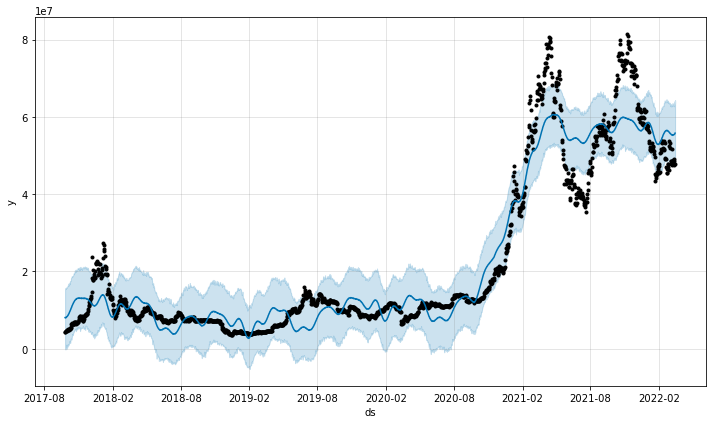

In [55]:
# Graph1
fig1 = model.plot(forecast)

/home/r320ws/anaconda3/envs/CoinATS/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/r320ws/anaconda3/envs/CoinATS/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


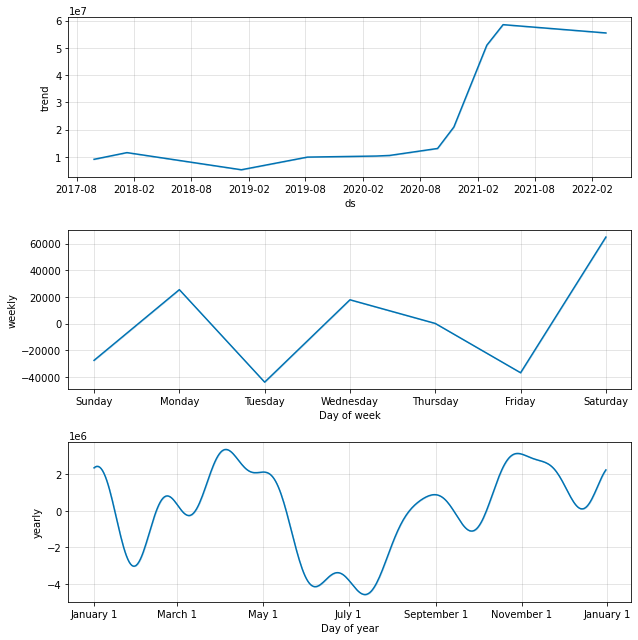

In [56]:
fig2 = model.plot_components(forecast)

In [57]:
# 매수 시점 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

47866000.0

In [58]:
# 종가의 가격을 구함

# 현재 시간이 자전 이전일 때
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

# 현재 시간이 자정 이후일 때
if len(closeDf) == 0:
    closeDf = forecate[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

closeValue = closeDf['yhat'].values[0]


In [59]:
closeValue

55786960.16564209